In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style='darkgrid'
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/deive')

Mounted at /content/deive


In [10]:
email = pd.read_csv('/content/deive/MyDrive/email.csv',index_col=0)
email

,filename,Message-ID,content,Class
Column1,,,,
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive


In [12]:
email.describe()

,filename,Message-ID,content,Class
count,48076,48076,48076,48076
unique,48076,48076,24656,2
top,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,Ken Lay and Jeff Skilling were interviewed on ...,Non Abusive
freq,1,1,19,44666


In [13]:
email.describe(include=object)

,filename,Message-ID,content,Class
count,48076,48076,48076,48076
unique,48076,48076,24656,2
top,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,Ken Lay and Jeff Skilling were interviewed on ...,Non Abusive
freq,1,1,19,44666


In [14]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [15]:
email.isna().sum()

filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [16]:
email.shape

(48076, 4)

In [17]:
email.drop(columns=['filename','Message-ID'],inplace=True)

In [18]:
email.head()

,content,Class
Column1,,
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [19]:
email.duplicated()

Column1
0        False
1        False
2        False
3        False
4        False
         ...  
48071     True
48072     True
48073     True
48074     True
48075     True
Length: 48076, dtype: bool

In [20]:
email.duplicated().sum()

23420

In [21]:
email.drop_duplicates(inplace=True)

In [22]:
email.head()

,content,Class
Column1,,
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [23]:
email['lenght'] = email['content'].apply(len)

In [24]:
email.head()

,content,Class,lenght
Column1,,,
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220
1,fuck you,Abusive,8
2,Gentlemen:\nThe following champagne is availab...,Abusive,612
3,sorry i've taken so long...just been trying to...,Abusive,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203


# Visualization

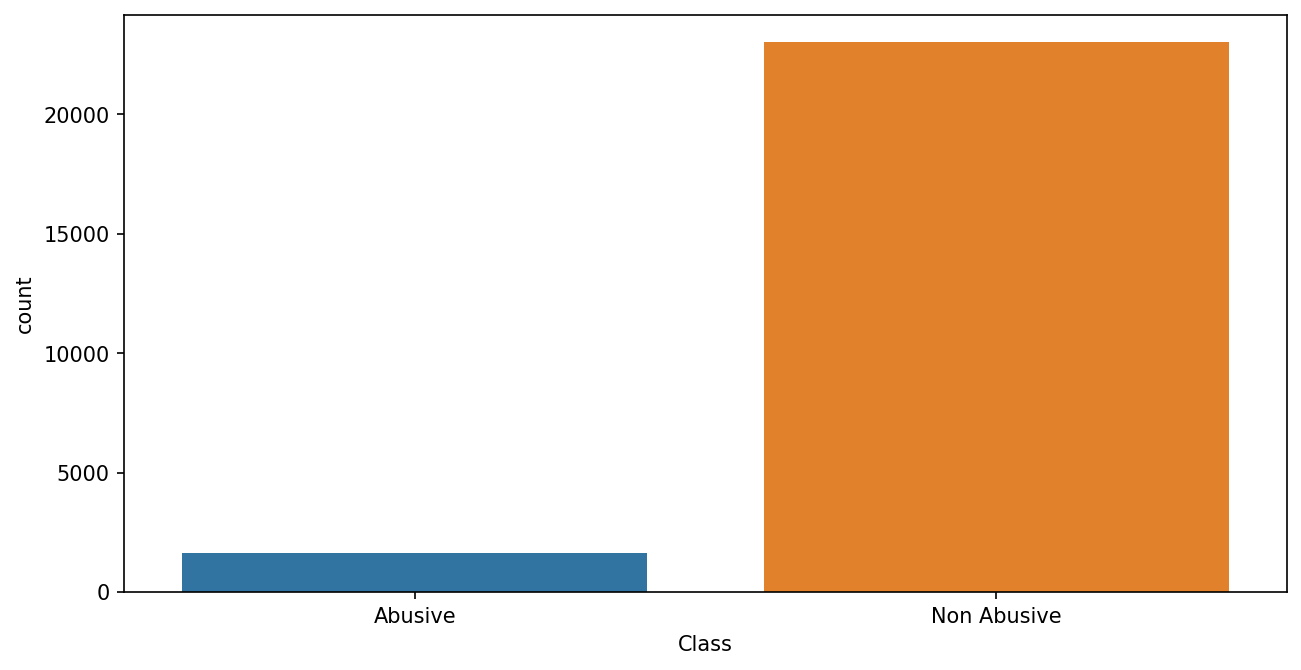

In [25]:
sns.countplot(data=email,x='Class')
sns.set_style='darkgrid'

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

email['target_class']= le.fit_transform(email['Class'])

# 0 = Abusive
# 1 = Non-Abusive

In [28]:
email.head()

,content,Class,lenght,target_class
Column1,,,,
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220,0
1,fuck you,Abusive,8,0
2,Gentlemen:\nThe following champagne is availab...,Abusive,612,0
3,sorry i've taken so long...just been trying to...,Abusive,505,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203,0


array([<Axes: title={'center': 'Abusive'}>,
       <Axes: title={'center': 'Non Abusive'}>], dtype=object)

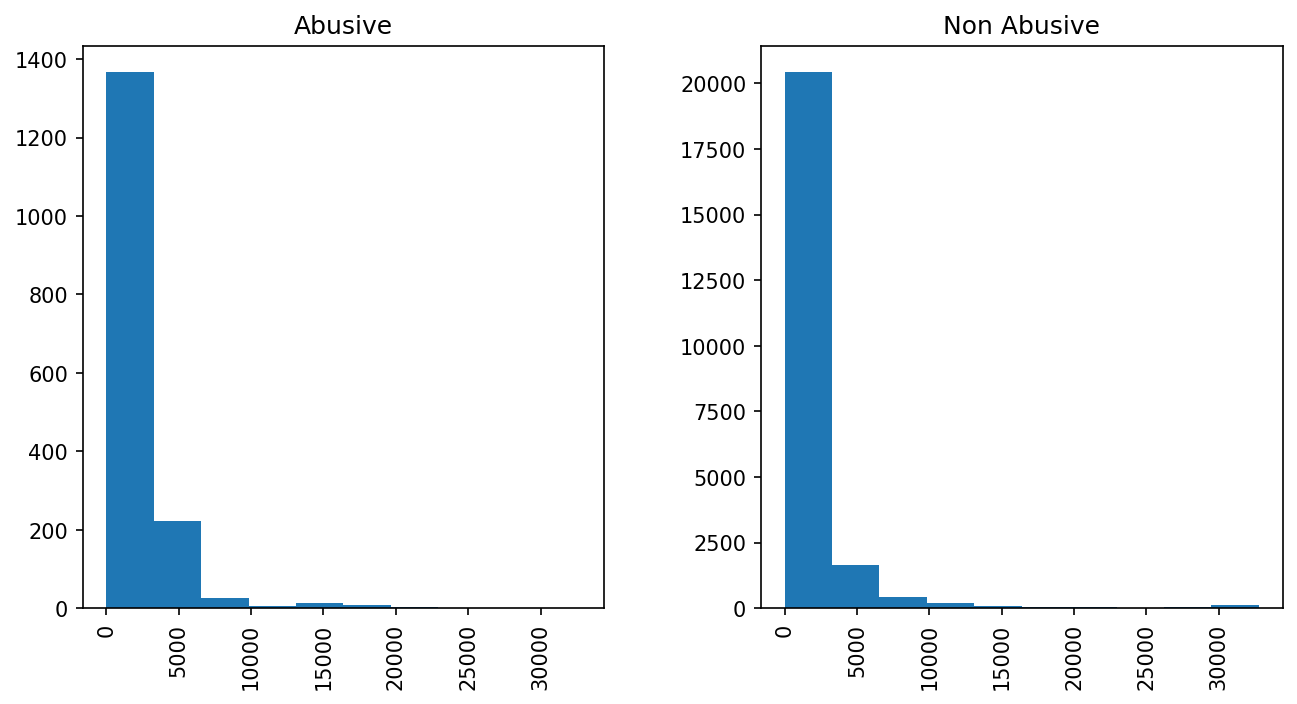

In [29]:
email.hist(column='lenght',by='Class')

In [30]:
abusive = email[email['Class']=='Abusive']
non_abusive = email[email['Class']== 'Non Abusive']

In [31]:
abusive.head()

,content,Class,lenght,target_class
Column1,,,,
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,220,0
1,fuck you,Abusive,8,0
2,Gentlemen:\nThe following champagne is availab...,Abusive,612,0
3,sorry i've taken so long...just been trying to...,Abusive,505,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,203,0


In [32]:
non_abusive.head()

,content,Class,lenght,target_class
Column1,,,,
3410,Here is our forecast\n\n,Non Abusive,23,1
3411,Traveling to have a business meeting takes the...,Non Abusive,786,1
3412,test successful. way to go!!!,Non Abusive,30,1
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive,187,1
3414,Let's shoot for Tuesday at 11:45.,Non Abusive,35,1


# Text Cleaning

In [33]:
import string

In [34]:
def txt_cleaner(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[0-9' ']+',' ',text)
    text=re.sub('[''""…]', ' ', text)
    text=re.sub('[\n]', ' ', text)
    text=re.sub('[\s]', ' ', text)
    text=text.lower()

    return text
clean = lambda x : txt_cleaner(x)

In [35]:
email['content'] = email['content'].apply(clean)
email.content

Column1
0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr            ...
                               ...                        
47974     do you need new leads for your business    do...
47975     image     image       image  garth brooks   w...
47977      image  image  image   dear smartreminders me...
47980      image     image     image      image  kid ro...
47981     you received this e mail because you register...
Name: content, Length: 24656, dtype: object

# Rmoving Stopword

In [36]:
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
stop = stopwords.words('english')
email['content'] = email['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [39]:
email

,content,Class,lenght,target_class
Column1,,,,
0,eat shit john j lavorato excelr pm john arnold...,Abusive,220,0
1,fuck,Abusive,8,0
2,gentlemen following champagne available approx...,Abusive,612,0
3,sorry taken long trying fend chicks life soooo...,Abusive,505,0
4,asshole john j lavorato excelr john arnold hou...,Abusive,203,0
...,...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1523,1
47975,image image image garth brooks wrapped image i...,Non Abusive,1126,1
47977,image image image dear smartreminders member i...,Non Abusive,892,1


In [40]:
abusive = email[email['Class']=='Abusive']
non_abusive = email[email['Class']== 'Non Abusive']

In [41]:
abusive

,content,Class,lenght,target_class
Column1,,,,
0,eat shit john j lavorato excelr pm john arnold...,Abusive,220,0
1,fuck,Abusive,8,0
2,gentlemen following champagne available approx...,Abusive,612,0
3,sorry taken long trying fend chicks life soooo...,Abusive,505,0
4,asshole john j lavorato excelr john arnold hou...,Abusive,203,0
...,...,...,...,...
3403,arkansas joke guy driving rural road arkansas ...,Abusive,259,0
3404,john thanks note yeah things look pretty lousy...,Abusive,419,0
3405,lot confused bullshit floating around,Abusive,57,0


In [42]:
non_abusive

,content,Class,lenght,target_class
Column1,,,,
3410,forecast,Non Abusive,23,1
3411,traveling business meeting takes fun trip espe...,Non Abusive,786,1
3412,test successful way go,Non Abusive,30,1
3413,randy send schedule salary level everyone sche...,Non Abusive,187,1
3414,let shoot tuesday,Non Abusive,35,1
...,...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1523,1
47975,image image image garth brooks wrapped image i...,Non Abusive,1126,1
47977,image image image dear smartreminders member i...,Non Abusive,892,1


# Word Cloud

In [43]:
def wordcl(data,heading):
    txt = ' '.join(data['content'])
    wc = WordCloud(background_color='black',width=700,height=700).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

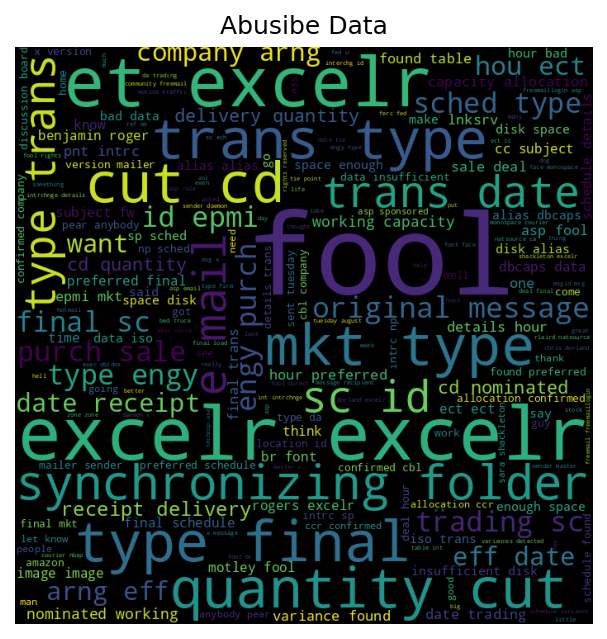

In [44]:
wordcl(abusive,'Abusibe Data')

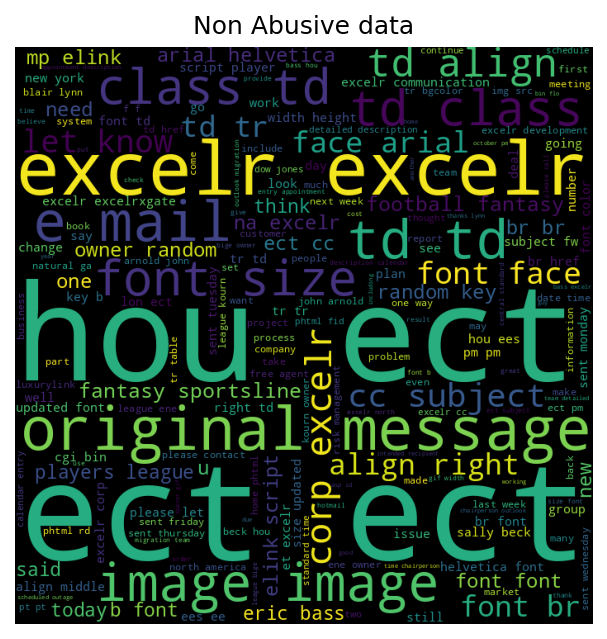

In [45]:
wordcl(non_abusive,'Non Abusive data')

# Resampling


In [48]:
email_sample = pd.read_csv('/content/deive/MyDrive/email.csv',index_col=0)
email_sample

,filename,Message-ID,content,Class
Column1,,,,
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive


In [49]:
email_sample.drop(columns=['filename','Message-ID'],inplace=True)
email_sample

,content,Class
Column1,,
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive


In [50]:
email_sample.drop_duplicates(inplace=True)

In [51]:
le = LabelEncoder()

email_sample['target_class']= le.fit_transform(email_sample['Class'])

# 0 = Abusive
# 1 = Non-Abusive

In [52]:
email_sample['content'] = email_sample['content'].apply(clean)
email_sample.content

Column1
0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr            ...
                               ...                        
47974     do you need new leads for your business    do...
47975     image     image       image  garth brooks   w...
47977      image  image  image   dear smartreminders me...
47980      image     image     image      image  kid ro...
47981     you received this e mail because you register...
Name: content, Length: 24656, dtype: object

In [53]:
stop = stopwords.words('english')
email_sample['content'] = email_sample['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [54]:
email_sample

,content,Class,target_class
Column1,,,
0,eat shit john j lavorato excelr pm john arnold...,Abusive,0
1,fuck,Abusive,0
2,gentlemen following champagne available approx...,Abusive,0
3,sorry taken long trying fend chicks life soooo...,Abusive,0
4,asshole john j lavorato excelr john arnold hou...,Abusive,0
...,...,...,...
47974,need new leads business need increased interne...,Non Abusive,1
47975,image image image garth brooks wrapped image i...,Non Abusive,1
47977,image image image dear smartreminders member i...,Non Abusive,1


In [55]:
email_sample.drop(columns=['Class'],inplace=True)

In [56]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



# Separate features (X) and target labels (y)
X = email_sample.drop('target_class', axis=1)  # Update with your target column name
y = email_sample['target_class']  # Update with your target column name

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Undersample the majority class
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Create new DataFrame with resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['target_column'] = y_resampled  # Update with your target column name

# Save the resampled DataFrame to a new CSV file
resampled_data.to_csv('resampled_data.csv', index=False)  # Update with desired file name


Class distribution before undersampling: Counter({1: 23014, 0: 1642})
Class distribution after undersampling: Counter({0: 1642, 1: 1642})


In [57]:
resampled_data

,content,target_column
0,eat shit john j lavorato excelr pm john arnold...,0
1,fuck,0
2,gentlemen following champagne available approx...,0
3,sorry taken long trying fend chicks life soooo...,0
4,asshole john j lavorato excelr john arnold hou...,0
...,...,...
3279,thanks sending dates writing already home cale...,1
3280,original message nolen glaze smtp nglaze oilst...,1
3281,looks awful lot like snow original message eri...,1
3282,tx rick original message gorny vladimir sent m...,1


# MOdel Buliding

## By using Count Vectorizer

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer()

In [60]:
x = cv.fit_transform(resampled_data['content']).toarray()

In [61]:
x.shape

(3284, 31389)

In [62]:
y = resampled_data['target_column'].values

In [63]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [66]:


from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [67]:
gnb = GaussianNB()
mb = MultinomialNB()
ber = BernoulliNB()

In [68]:
gnb.fit(xtrain,ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.8356997971602435
[[440  58]
 [104 384]]
0.8687782805429864


In [69]:
mb.fit(xtrain,ytrain)
ypred2 = mb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.9036511156186613
[[427  71]
 [ 24 464]]
0.8672897196261682


In [70]:
ber.fit(xtrain,ytrain)
ypred3 = ber.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.8772819472616633
[[456  42]
 [ 79 409]]
0.9068736141906873


## By using TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf = TfidfVectorizer()

In [73]:
x = tfidf.fit_transform(resampled_data['content']).toarray()

In [74]:
y = resampled_data['target_column'].values

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [76]:
gnb.fit(xtrain,ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.8377281947261663
[[414  84]
 [ 76 412]]
0.8306451612903226


In [77]:
mb.fit(xtrain,ytrain)
ypred2 = mb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.9087221095334685
[[444  54]
 [ 36 452]]
0.8932806324110671


In [78]:
ber.fit(xtrain,ytrain)
ypred3 = ber.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.8772819472616633
[[456  42]
 [ 79 409]]
0.9068736141906873


## Trying With differnt Models

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid',gamma=1.0)
lg = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bbc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [81]:
# creating fore loop To train all above algo


In [82]:
cls = {
    'SVC' : svc,
    'Lg' : lg,
    'NB':mnb,
    'DTC':dtc,
    'Rfc':rfc,
    'ABC':abc,
    'BBC':bbc,
    'ETC':etc,
    'GBC':gbc,
    'XGB':xgb
}

In [83]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
  clf.fit(xtrain,ytrain)
  ypred=clf.predict(xtest)
  accuracy__score = accuracy_score(ytest,ypred)
  precision__score = precision_score(ytest,ypred)

  return accuracy__score,precision__score

In [84]:
svc= train_classifier(svc,xtrain,ytrain,xtest,ytest)
svc

(0.9452332657200812, 0.9617021276595744)

In [85]:
lg = train_classifier(lg,xtrain,ytrain,xtest,ytest)
lg

(0.9330628803245437, 0.9527896995708155)

In [86]:
mnb = train_classifier(mnb,xtrain,ytrain,xtest,ytest)
mnb

(0.9087221095334685, 0.8932806324110671)

In [87]:
dtc = train_classifier(dtc,xtrain,ytrain,xtest,ytest)
dtc

(0.744421906693712, 0.8277777777777777)

In [88]:
rfc = train_classifier(rfc,xtrain,ytrain,xtest,ytest)
rfc

(0.8803245436105477, 0.8517110266159695)

In [89]:
abc = train_classifier(abc,xtrain,ytrain,xtest,ytest)
abc

(0.8640973630831643, 0.8782051282051282)

In [90]:
etc = train_classifier(etc,xtrain,ytrain,xtest,ytest)
etc

(0.9168356997971603, 0.8888888888888888)

In [91]:
gbc = train_classifier(gbc,xtrain,ytrain,xtest,ytest)
gbc

(0.8427991886409736, 0.8758465011286681)

In [92]:
xgb = train_classifier(xgb,xtrain,ytrain,xtest,ytest)
xgb

(0.8732251521298174, 0.8971553610503282)

# Voting Classifier

In [93]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
lg = LogisticRegression()

from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svc',svc),('nb',mnb),('lg',lg)],voting='soft')

In [95]:
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('lg', LogisticRegression())],
                 voting='soft')

In [96]:
ypred = voting.predict(xtest)
print("Accuracy_score",accuracy_score(ytest,ypred))
print("Precision_score",precision_score(ytest,ypred))

Accuracy_score 0.9462474645030426
Precision_score 0.9559748427672956


In [99]:
import pickle

In [100]:
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))

In [101]:
import joblib

In [102]:
joblib.dump(tfidf,open('vector.job','wb'))
joblib.dump(svc,open('model.job','wb'))